In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [64]:
train = pd.read_csv('extract_train_Jul08.csv')
train = train.drop(['index'], axis = 1)
train = train.drop(test.columns[0],axis = 1)

In [65]:
scaler=StandardScaler() #instantiate
scaler.fit(train) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(train)

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
pca=PCA() 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled)
df = pd.DataFrame(X_pca[:,:9])
df.to_csv('pca_exported_9features.csv')
#let's check the shape of X_pca array
#print("shape of X_pca", X_pca.shape)

In [85]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[3.45248125e-01 1.39767020e-01 9.82303272e-02 7.28278192e-02
 7.09750129e-02 6.49044183e-02 6.26961676e-02 5.72801645e-02
 5.52144181e-02 1.99838033e-02 7.02678248e-03 3.01441013e-03
 2.37808430e-03 4.09787551e-04 4.36585838e-05]


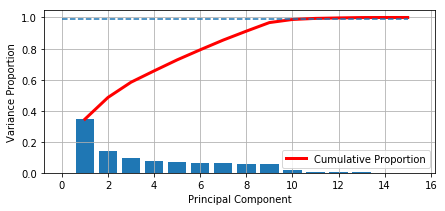

In [102]:
plt.figure(figsize=(7,3))
plt.bar(np.arange(1,16),pca.explained_variance_ratio_, linewidth=3)
plt.plot(np.arange(1,16),np.cumsum(pca.explained_variance_ratio_), linewidth=3, c = 'r', label = 'Cumulative Proportion')
plt.legend()
plt.xlabel('Principal Component')
plt.ylabel('Variance Proportion')
plt.grid()
plt.plot([0.99]*16, '--')

In [82]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[3.45248125e-01 1.39767020e-01 9.82303272e-02 7.28278192e-02
 7.09750129e-02 6.49044183e-02 6.26961676e-02 5.72801645e-02
 5.52144181e-02 1.99838033e-02 7.02678248e-03 3.01441013e-03
 2.37808430e-03 4.09787551e-04 4.36585838e-05]


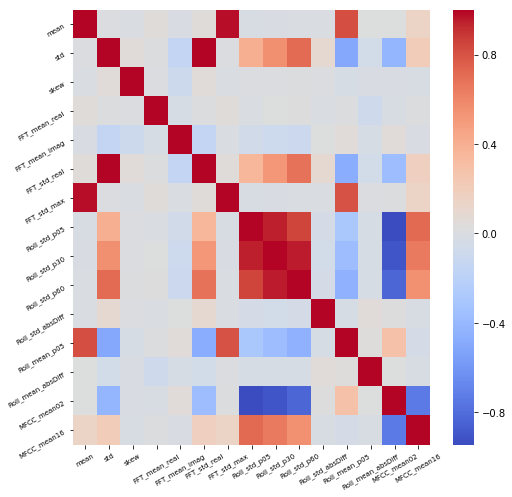

In [70]:
features = test.columns
import seaborn as sns

plt.figure(figsize=(8,8))
s=sns.heatmap(test.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.show()

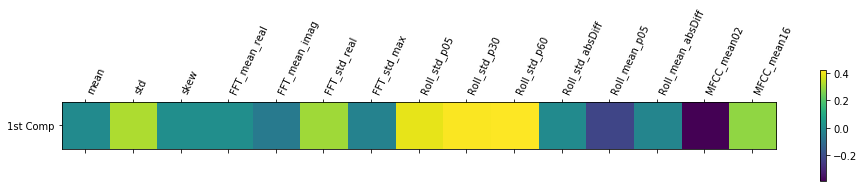

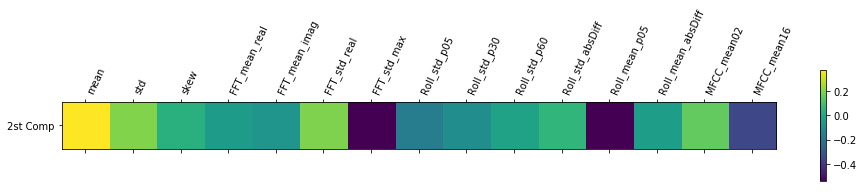

In [83]:
#plt.matshow(pca.components_,cmap='viridis')
#print(pca.components_[0])
plt.matshow([pca.components_[0]],cmap='viridis')
plt.yticks([0],['1st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(test.columns)),test.columns,rotation=65,ha='left')
plt.show()

plt.matshow([pca.components_[1]],cmap='viridis')
plt.yticks([0],['2st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(test.columns)),test.columns,rotation=65,ha='left')
plt.show()#

In [103]:
a = np.abs(pca.components_[0])
a = a/np.max(a)
df = pd.DataFrame()
df['features'] = test.columns
df['importance'] = a
df.to_csv('PCA_extracted.csv')
print(df.shape)

(15, 2)
